In [1]:
import folium
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Importing dataframes

In [2]:
dub_tourism = pd.read_csv('dublin_tourism.csv')
dub_accomodation = pd.read_csv('dublin_hotels.csv')
dub_university = pd.read_csv('dublin_university.csv')
dub_companies = pd.read_csv('company_geo_list.csv')
dub_cafe= pd.read_csv('dublin_cafe.csv')
dub_restaurant = pd.read_csv('dublin_restaurant.csv')
dub_luas = pd.read_csv('luas_list.csv')

#### Merging dataframes into dub_df

In [3]:
dub_df = pd.DataFrame()
dub_df = dub_df.append(dub_tourism)
dub_df = dub_df.append(dub_accomodation)
dub_df = dub_df.append(dub_university)
dub_df = dub_df.append(dub_companies)
dub_df = dub_df.append(dub_cafe)
dub_df = dub_df.append(dub_restaurant)
dub_df = dub_df.append(dub_luas)
print ('Dataframe has {} rows.'.format (str(dub_df.shape[0])))

Dataframe has 1728 rows.


In [4]:
dub_df.head()

Name   Latitude  Longitude Classification
0         Herbert Park  53.327156  -6.234803        Tourism
1    St Patrick's Park  53.340110  -6.271894        Tourism
2       Iveagh Gardens  53.335680  -6.261059        Tourism
3   St Stephen's Green  53.338151  -6.259160        Tourism
4  Merrion Square Park  53.340138  -6.250451        Tourism

In [16]:
#dub_df.to_csv('Dublin_DF_all_features.csv', index=False)

In [3]:
df = pd.read_csv('Features_csv/Dublin_DF_all_features.csv')
df_pub = pd.read_csv('Features_csv/dublin_pub.csv')
df_pub.drop_duplicates(['Name'], inplace=True)
df_pub['Classification'] = 'Pub'
df = df.append(df_pub)
dub_df = df.copy()

#### Map with features within the project scope

In [13]:
dub_latitude = '53.341785'
dub_longitude = '-6.265288'
# create map of Dublin using latitude and longitude values
map_dublin = folium.Map(location=[dub_latitude, dub_longitude], zoom_start=13)
coordinates = [[53.356207, -6.287982],[53.356207, -6.235029],[53.3514, -6.227464],
               [53.327363, -6.227464],[53.322556, -6.235029],[53.322556, -6.287982],
               [53.327363, -6.295547],[53.3514, -6.295547],[53.356207, -6.287982]]
colors = {'Tourism':'green', 'Accommodation':'red', 'University':'purple', 
          'Company':'orange', 'Cafe':'brown', 'Restaurant':'blue', 'Luas stop':'yellow', 'Pub':'brown'}
fillings = {'Tourism':'#00ff40', 'Accommodation':'#ff4000', 'University':'#ee82d3', 
          'Company':'#ffa500', 'Cafe':'#635f9c', 'Restaurant':'#3186cc', 'Luas stop':'#cccc00', 'Pub':'#635f9c'}

# add markers to map
for lat, lng, label, classy in zip(dub_df['Latitude'], dub_df['Longitude'], dub_df['Name'], dub_df['Classification']):
    label = folium.Popup(label, parse_html=True)
    folium.PolyLine(coordinates, color='grey', weight=2).add_to(map_dublin)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color= colors[classy],
        fill=True,
        fill_color= fillings[classy],
        fill_opacity=0.3,
        parse_html=False).add_to(map_dublin)

map_dublin

### <center><font color=green>__Tourism__</font>, <font color=blue>__Restaurant__</font>, <font color=red>__Accommodation__</font>, <font color=purple>__University__</font>, <font color=brown>__Cafe__</font>, <font color=brown>__Pub__</font>, <font color=orange>__Companies__</font>, <font color=yellow>__Luas stop__</font>, <font color=grey>__Project boundary__</font></center>

In [5]:
dfc = df.groupby(['Classification']).count()
dfc.sort_values(by=['Name'], inplace=True)

In [6]:
dfc.Name

Classification
University        17
Luas stop         23
Tourism           63
Accommodation    203
Cafe             210
Pub              301
Company          311
Restaurant       901
Name: Name, dtype: int64

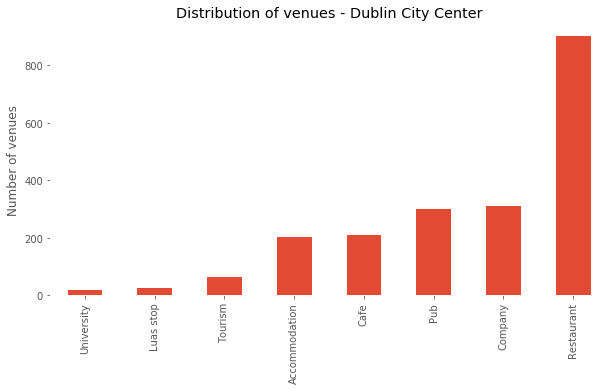

In [11]:
mpl.style.use('ggplot')
ax = dfc.Name.plot(kind='bar', figsize=(10, 5))
ax.set_facecolor('white')
plt.xlabel('')
plt.ylabel('Number of venues')
plt.title('Distribution of venues - Dublin City Center')
plt.savefig('pics/Distribution_Venues.png', bbox_inches='tight', format='png', dpi=500)
plt.show()

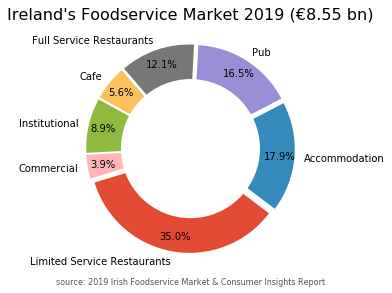

In [9]:
foodservice = {'Limited Service Restaurants':2995, 'Accommodation':1531, 
               'Pub':1415,'Full Service Restaurants':1039, 'Cafe':482, 
               'Institutional':763, 'Commercial':330}
labels = foodservice.keys()
sizes = foodservice.values()
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=197, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Ireland\'s Foodservice Market 2019 (€8.55 bn)', fontsize=16) 
plt.tight_layout()
plt.xlabel('source: 2019 Irish Foodservice Market & Consumer Insights Report', y=5, fontsize=8)

plt.savefig('pics/Foodservice_chart.png', bbox_inches='tight', format='png', dpi=500)
plt.show()